# LENDING CLUB CASE STYDY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv to data frame
loan_df=pd.read_csv("loan.csv",dtype={"last_pymnt_amnt": float})

C:\Users\sai\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Checking for nulls in columns
loan_df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Filtering Data

In [4]:
#Removing people with loan status as current
loan_df=loan_df[loan_df.loan_status !="Current"]

# Handling Null/Missing values

In [5]:
#Dropping all columns with 100% null values
loan_df.dropna(how='all', axis=1, inplace=True)

In [6]:
print(len(loan_df.columns))

56


 Out of 111 columns 55 columns are null so removed them

In [7]:
# Selecting columns based on business requirements
loan_df1=loan_df[["loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","purpose","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","pub_rec_bankruptcies"]]

In [8]:
print(len(loan_df1.columns))

34


 Now we are left with 34 columns

In [9]:
loan_df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d              71
last_pymnt_amnt            0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [10]:
loan_df1.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [11]:
loan_df1.emp_length=loan_df1.emp_length.fillna("10+ years")

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
loan_df1.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [13]:
loan_df1.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
out_prncp                 0
total_pymnt               0
total_rec_prncp           0
total_rec_int             0
total_rec_late_fee        0
recoveries                0
last_pymnt_d             71
last_pymnt_amnt           0
last_credit_pull_d        2
pub_rec_bankruptcies    697
dtype: int64

In [14]:
#Handling null values in "revol_util" by replacing them with mode of column
loan_df1.revol_util=loan_df1.revol_util.fillna("0%")

In [15]:
#Handling Null values in last_pymnt_d by replacing them with mode of column
loan_df1.last_pymnt_d=loan_df1.last_pymnt_d.fillna("Mar-13")

In [16]:
#Handling Null values in pub_rec_bankruptcies by replacing them with mode of column
loan_df1.pub_rec_bankruptcies=loan_df1.pub_rec_bankruptcies.fillna(0.0)

In [17]:
#Handling Null values in "last_credit_pull_d" by replacing them with mode of column
loan_df1.last_credit_pull_d=loan_df1.last_credit_pull_d.fillna("May-16")

# ANALYSIS

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='count'>

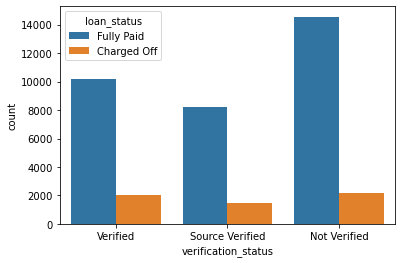

In [18]:
sns.countplot(loan_df1["verification_status"],hue=loan_df1["loan_status"], data=loan_df1)

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

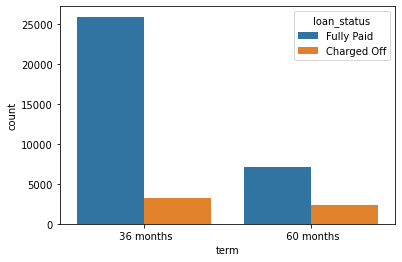

In [19]:
sns.countplot(loan_df1["term"],hue=loan_df1["loan_status"], data=loan_df1)

In [20]:
loan_df1.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
17.34%      1
18.72%      1
17.54%      1
18.36%      1
21.48%      1
Name: int_rate, Length: 370, dtype: int64

In [21]:
loan_df1.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
out_prncp               float64
total_pymnt             float64
total_rec_prncp         float64
total_rec_int           float64
total_rec_late_fee      float64
recoveries              float64
last_pymnt_d             object
last_pym

In [22]:
loan_df1.int_rate=loan_df1.int_rate.astype(str)

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:x[:-1])

In [24]:
loan_df1.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
out_prncp               float64
total_pymnt             float64
total_rec_prncp         float64
total_rec_int           float64
total_rec_late_fee      float64
recoveries              float64
last_pymnt_d             object
last_pym

In [25]:
loan_df1.int_rate=loan_df1.int_rate.astype(float)

In [26]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:1.0 if  x<=6.0 else x)

In [27]:
loan_df1.int_rate.value_counts()

1.00     1346
10.99     913
11.49     790
7.51      787
13.49     749
         ... 
16.71       1
18.36       1
16.20       1
20.52       1
22.64       1
Name: int_rate, Length: 367, dtype: int64

In [28]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:2.0 if  (x>6.0 and x<=8.0) else x)

In [29]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:3.0 if  (x>8.0 and x<=10.0) else x)

In [30]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:4.0 if  (x>10.0 and x<=15.0) else x)

In [31]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:5.0 if  (x>15.0 and x<=20.0) else x)

In [32]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:6.0 if  (x>20.0) else x)

In [33]:
loan_df1.int_rate.value_counts()

4.0    18265
5.0     7226
2.0     6872
3.0     4098
1.0     1346
6.0      770
Name: int_rate, dtype: int64

In [34]:
loan_df1.int_rate=loan_df1.int_rate.astype(str)

In [35]:
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:"Range less than 6" if  x=="1.0" else x)
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:"Range 6 to 8" if  x=="2.0" else x)
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:"Range 8 to 10" if  x=="3.0" else x)
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:"Range 10 to 15" if  x=="4.0" else x)
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:"Range 15 to 20" if  x=="5.0" else x)
loan_df1.int_rate=loan_df1.int_rate.apply(lambda x:"Range Greater than 20" if  x=="6.0" else x)




In [36]:
loan_df1.int_rate.value_counts()

Range 10 to 15           18265
Range 15 to 20            7226
Range 6 to 8              6872
Range 8 to 10             4098
Range less than 6         1346
Range Greater than 20      770
Name: int_rate, dtype: int64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate', ylabel='count'>

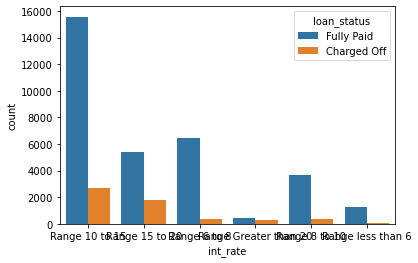

In [37]:
sns.countplot(loan_df1["int_rate"],hue=loan_df1["loan_status"], data=loan_df1)

In [38]:
loan_df1.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
out_prncp               float64
total_pymnt             float64
total_rec_prncp         float64
total_rec_int           float64
total_rec_late_fee      float64
recoveries              float64
last_pymnt_d             object
last_pym

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

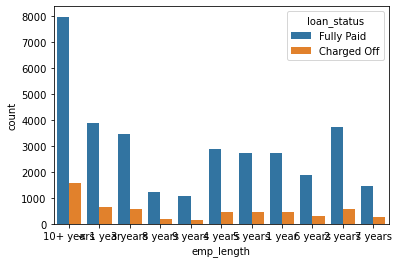

In [39]:
sns.countplot(loan_df1["emp_length"],hue=loan_df1["loan_status"], data=loan_df1)

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

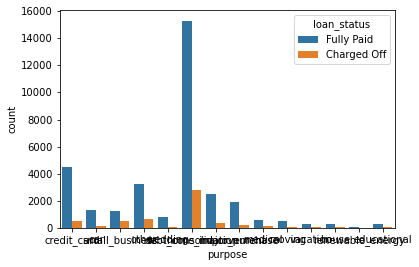

In [40]:
sns.countplot(loan_df1["purpose"],hue=loan_df1["loan_status"], data=loan_df1)

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

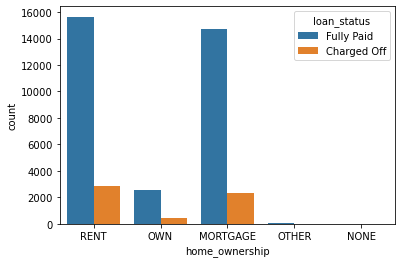

In [41]:
sns.countplot(loan_df1["home_ownership"],hue=loan_df1["loan_status"], data=loan_df1)

In [42]:
loan_df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [43]:
#loan_df1.plot(x="loan_status", y=["annual_inc","home_ownership"], kind="bar")

In [44]:
#loan_df1.annual_inc.value_counts().plot(kind="bar")

In [45]:
loan_df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
loan_df1.plot(x="loan_status", y=["pub_rec_bankruptcies","verification_status"], kind="bar")

<AxesSubplot:xlabel='loan_status'>

In [47]:
loan_df1.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64